# Pseudo Labeling

## fusion model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import shutil
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))

from backend.utils.models.fusion_data import grouping_data, predict_by_model_fusion
from backend.utils.comparing import plot_confusion_matrix
MODEL_PATH = os.path.join(PATH, 'backend/models')
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
round_num = 3

2025-08-04 13:19:05.459292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Test With Groundtruth

In [3]:
feature, ground_df, label_cols = grouping_data(LABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH20
invalid instruction: PUSH18
invalid instruction: PUSH28
invalid instruction: PUSH32
invalid instruction: PUSH31
invalid instruction: PUSH30
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH31
invalid instruction: PUSH25
invalid instruction: PUSH14
invalid instruction: PUSH32
invalid instruction: PUSH30
invalid instruction: PUSH25
invalid instruction: PUSH30
invalid instruction: PUSH15
invalid instruction: PUSH22
invalid instruction: PUSH20
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH26
invalid instruction: PUSH16
invalid instruction: PUSH23
invalid instruction: PUSH8
invalid instruction: PUSH17
invalid instruction: PUSH14
invalid instruction: PUSH15
invalid instruction: PUSH5
invalid instruction: PUSH7
invalid instruction: PUSH10
invalid instruction: PUSH27
invalid instruction: PU

Skipping 0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad: invalid literal for int() with base 10: ''


Extracting timeline features:  17%|█▋        | 43/246 [00:00<00:01, 116.70it/s]

Skipping 0x740e6b6f0a0165e8bb3d1cdf94862bdffbded22e: invalid literal for int() with base 10: ''


Extracting timeline features:  26%|██▋       | 65/246 [00:00<00:02, 86.89it/s] 

Skipping 0x36b14bae0989f65f80892b99a55378d3e1a80c81: invalid literal for int() with base 10: ''
Skipping 0x7fc408011165760ee31be2bf20daf450356692af: invalid literal for int() with base 10: ''
Skipping 0xdd007278b667f6bef52fd0a4c23604aa1f96039a: invalid literal for int() with base 10: ''


Extracting timeline features:  41%|████▏     | 102/246 [00:01<00:01, 106.68it/s]

Skipping 0x4e7a34c6c29a4741858a7ec5622cd8be21b0351b: invalid literal for int() with base 10: ''
Skipping 0xc310755f88145cabcaa06c714cd668b5465dceaa: invalid literal for int() with base 10: ''


Extracting timeline features:  71%|███████   | 174/246 [00:02<00:00, 78.93it/s] 

Skipping 0xff1560afef58be59b11c72734ad1d89db63e4e71: invalid literal for int() with base 10: ''
Skipping 0xf1afddbed214dba82cb98d46ad0a96e643f7f6f6: invalid literal for int() with base 10: ''


Extracting timeline features:  89%|████████▉ | 220/246 [00:02<00:00, 91.72it/s] 

Skipping 0xb9aac097f4dadcd6f06761eb470346415ef28d5a: invalid literal for int() with base 10: ''
Skipping 0x56ba2ee7890461f463f7be02aac3099f6d5811a8: invalid literal for int() with base 10: ''
Skipping 0x2f22c502a8029d5e64aeafb6e0a214c0323f43c7: invalid literal for int() with base 10: ''
Skipping 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb: invalid literal for int() with base 10: ''


Extracting timeline features:  98%|█████████▊| 242/246 [00:02<00:00, 79.85it/s]

Skipping 0x514bc174df04a4b04ae2be81ee8c788c3796b06b: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 246/246 [00:02<00:00, 83.41it/s]


In [4]:
list(feature.items())[0]

('0x93023f1d3525e273f291b6f76d2f5027a39bf302',
 {'byte': opcode_entropy                       0.0
  byte_entropy                         0.0
  byte_0x                              1.0
  byte_60                              0.0
  byte_80                              0.0
                                      ... 
  dup5 gas delegatecall                0.0
  delegatecall returndatasize push1    0.0
  jumpdest returndatasize push1        0.0
  returndatasize push1 return          0.0
  iszero eq push2                      0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 8144, dtype: float64,
  'txn': txn_nums              0.0
  event_nums            0.0
  creation_block        0.0
  creation_timestamp    0.0
  start_block           0.0
                       ... 
  slashstake_num        0.0
  banauditor_num        0.0
  owner_num             0.0
  setdth_num            0.0
  init_num              0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 370, dtype: flo

              precision    recall  f1-score   support

        Mint       0.52      0.50      0.51       123
        Leak       0.45      0.47      0.46       133
       Limit       0.23      0.14      0.18        77

   micro avg       0.44      0.41      0.42       333
   macro avg       0.40      0.37      0.38       333
weighted avg       0.43      0.41      0.41       333
 samples avg       0.36      0.33      0.31       333



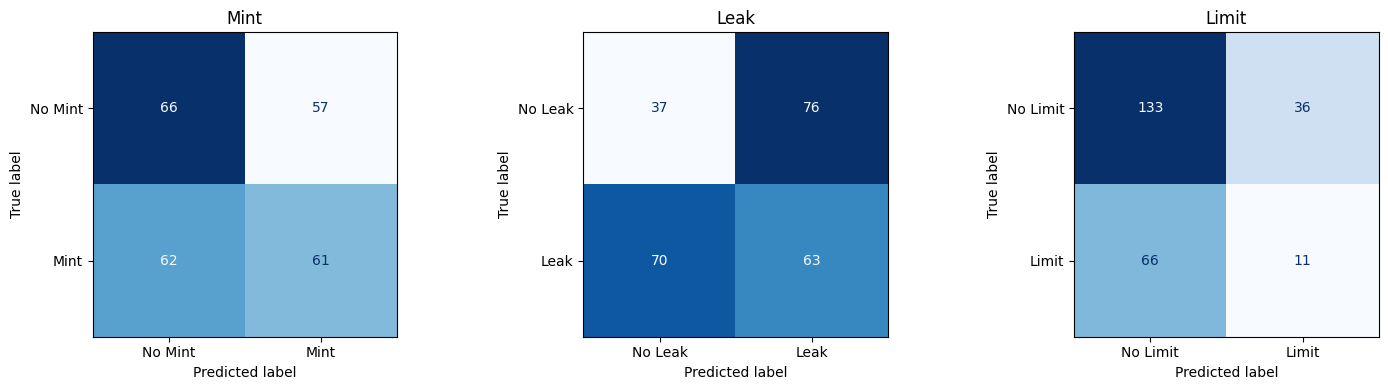

In [5]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols)
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)

============== Threshold: 0.0 ==============
              precision    recall  f1-score   support

        Mint       0.50      1.00      0.67       123
        Leak       0.54      0.99      0.70       133
       Limit       0.31      1.00      0.48        77

   micro avg       0.45      1.00      0.62       333
   macro avg       0.45      1.00      0.61       333
weighted avg       0.47      1.00      0.64       333
 samples avg       0.45      0.82      0.56       333



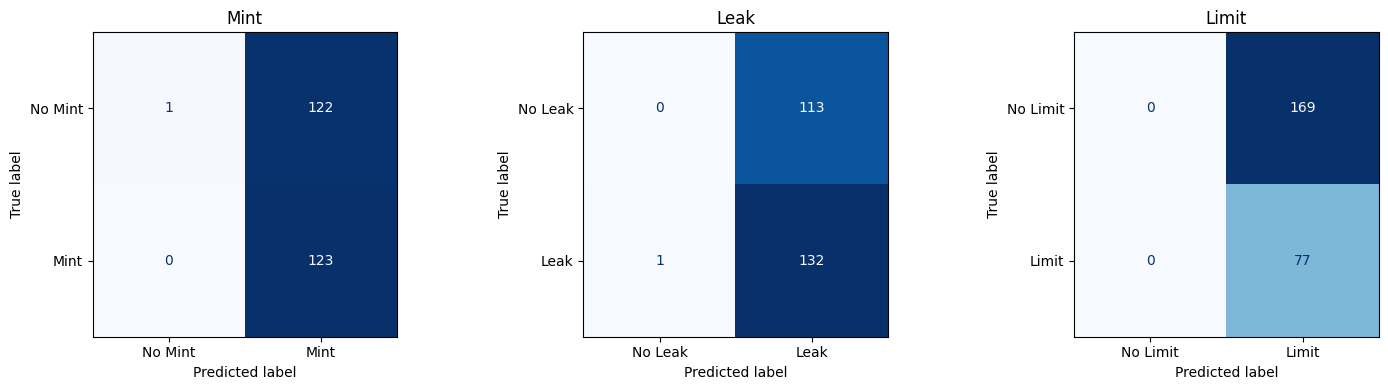

============== Threshold: 0.1 ==============
              precision    recall  f1-score   support

        Mint       0.50      1.00      0.67       123
        Leak       0.54      0.99      0.70       133
       Limit       0.31      1.00      0.48        77

   micro avg       0.45      1.00      0.62       333
   macro avg       0.45      1.00      0.61       333
weighted avg       0.47      1.00      0.64       333
 samples avg       0.45      0.82      0.56       333



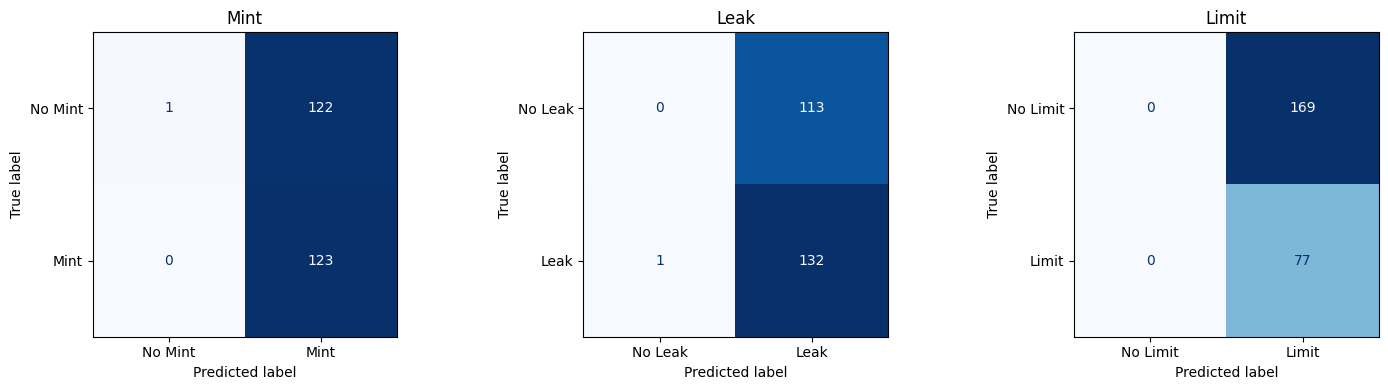

============== Threshold: 0.2 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.98      0.66       123
        Leak       0.53      0.98      0.69       133
       Limit       0.31      0.92      0.47        77

   micro avg       0.45      0.97      0.62       333
   macro avg       0.45      0.96      0.61       333
weighted avg       0.47      0.97      0.63       333
 samples avg       0.46      0.79      0.55       333



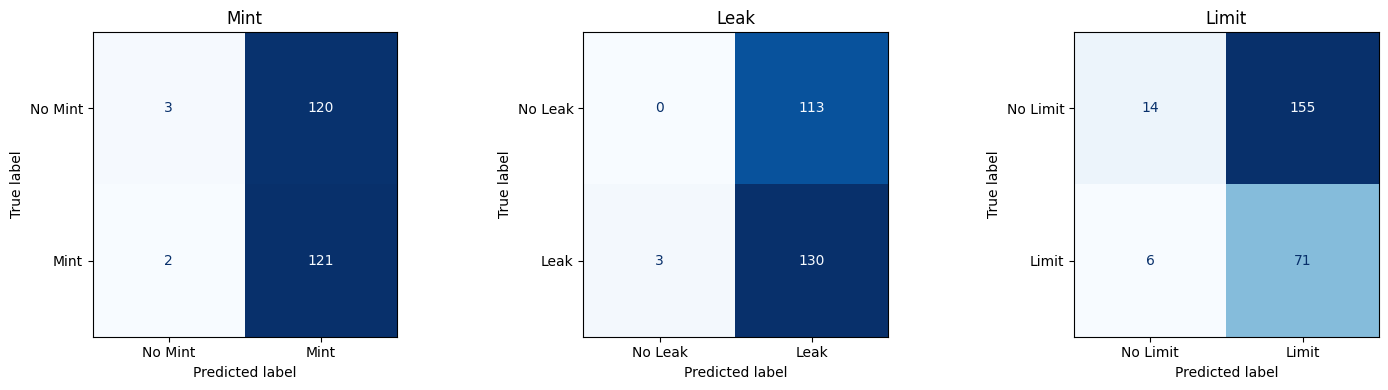

============== Threshold: 0.30000000000000004 ==============
              precision    recall  f1-score   support

        Mint       0.51      0.97      0.66       123
        Leak       0.53      0.95      0.68       133
       Limit       0.31      0.74      0.44        77

   micro avg       0.46      0.91      0.61       333
   macro avg       0.45      0.89      0.59       333
weighted avg       0.47      0.91      0.62       333
 samples avg       0.47      0.75      0.55       333



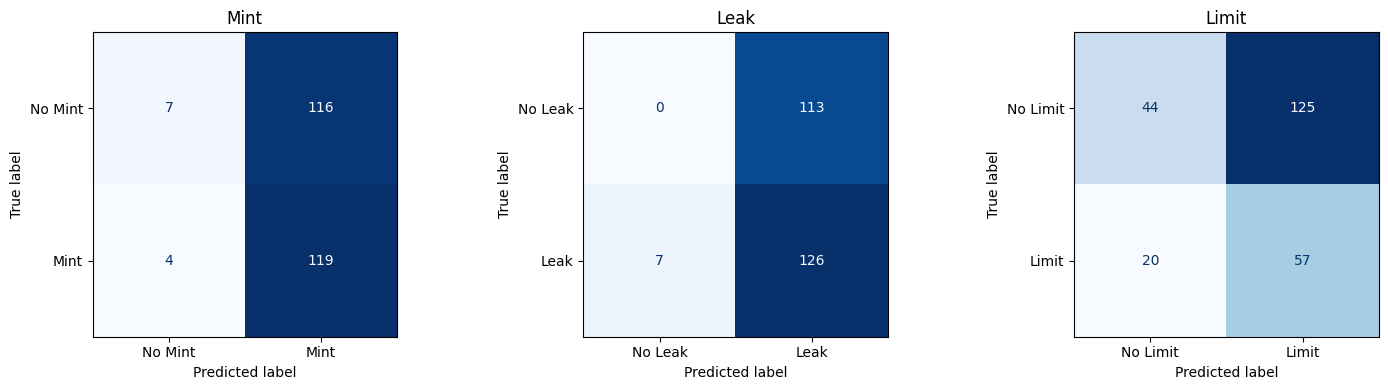

============== Threshold: 0.4 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.82      0.62       123
        Leak       0.50      0.77      0.61       133
       Limit       0.29      0.51      0.37        77

   micro avg       0.45      0.73      0.55       333
   macro avg       0.43      0.70      0.53       333
weighted avg       0.45      0.73      0.56       333
 samples avg       0.46      0.61      0.48       333



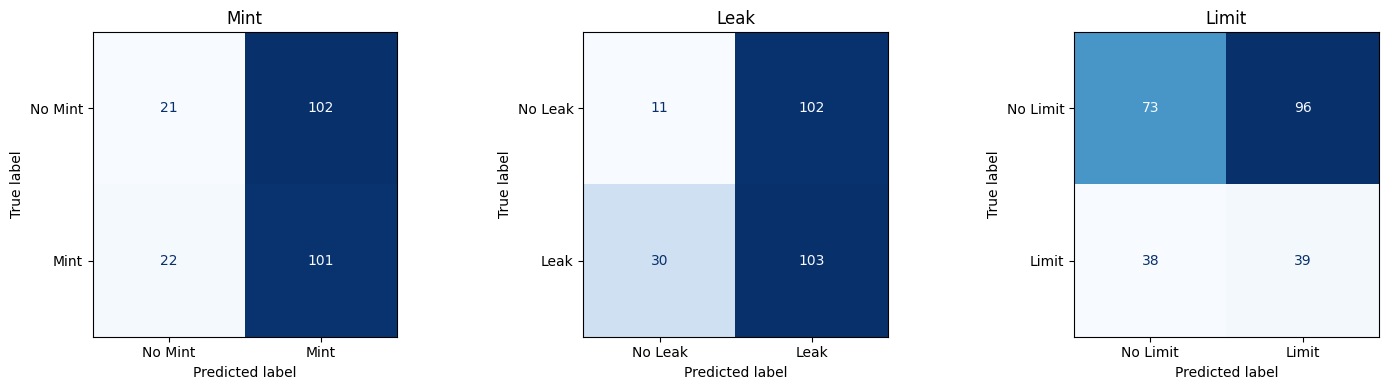

============== Threshold: 0.5 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.80      0.62       123
        Leak       0.49      0.71      0.58       133
       Limit       0.26      0.35      0.30        77

   micro avg       0.44      0.66      0.53       333
   macro avg       0.41      0.62      0.50       333
weighted avg       0.44      0.66      0.53       333
 samples avg       0.44      0.55      0.45       333



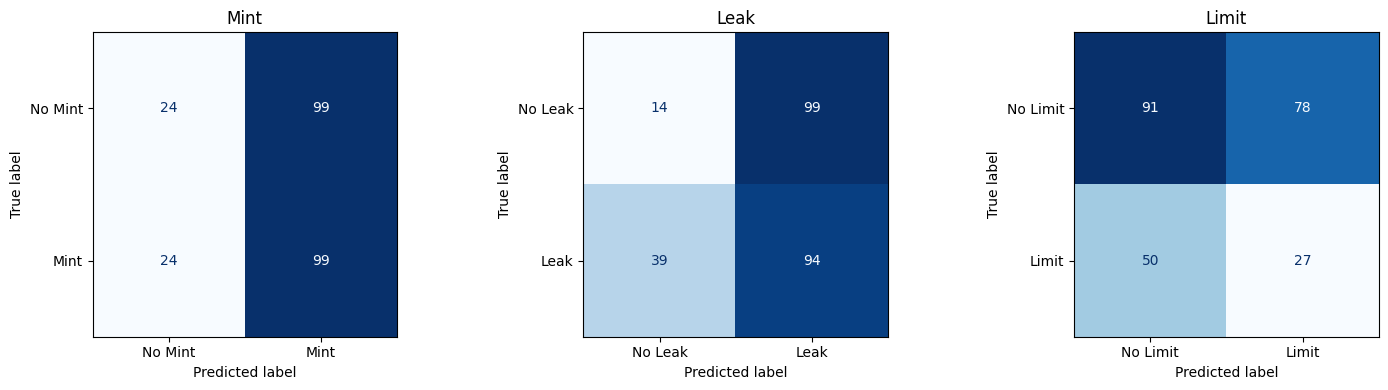

============== Threshold: 0.6000000000000001 ==============
              precision    recall  f1-score   support

        Mint       0.52      0.50      0.51       123
        Leak       0.45      0.47      0.46       133
       Limit       0.23      0.14      0.18        77

   micro avg       0.44      0.41      0.42       333
   macro avg       0.40      0.37      0.38       333
weighted avg       0.43      0.41      0.41       333
 samples avg       0.36      0.33      0.31       333



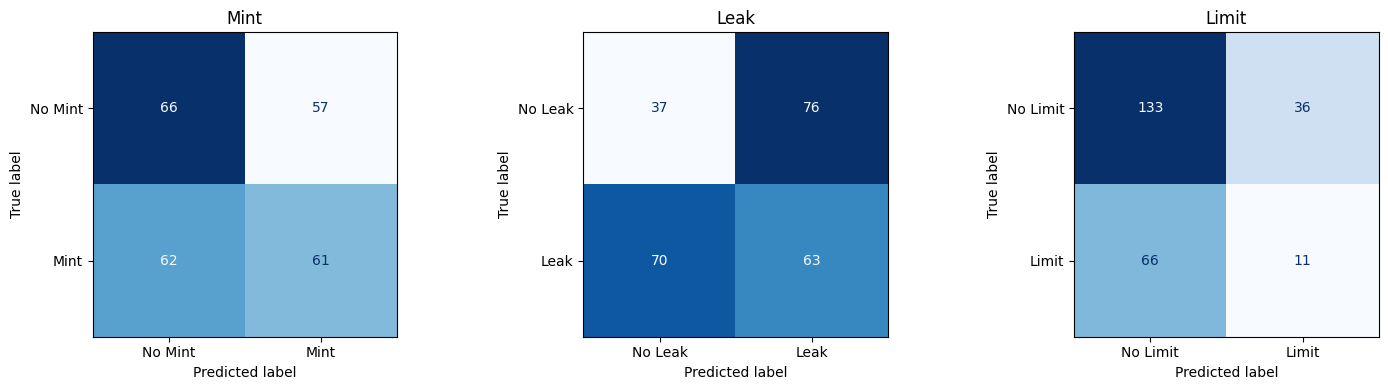

============== Threshold: 0.7000000000000001 ==============
              precision    recall  f1-score   support

        Mint       0.50      0.34      0.41       123
        Leak       0.40      0.29      0.33       133
       Limit       0.19      0.06      0.10        77

   micro avg       0.42      0.26      0.32       333
   macro avg       0.37      0.23      0.28       333
weighted avg       0.39      0.26      0.31       333
 samples avg       0.27      0.22      0.22       333



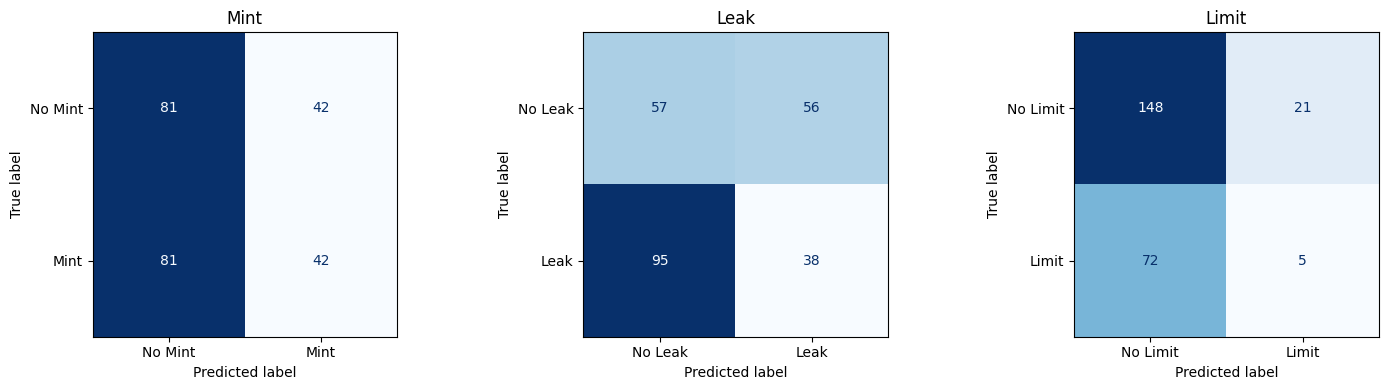

============== Threshold: 0.8 ==============
              precision    recall  f1-score   support

        Mint       0.55      0.18      0.27       123
        Leak       0.39      0.18      0.25       133
       Limit       0.19      0.04      0.06        77

   micro avg       0.42      0.15      0.22       333
   macro avg       0.38      0.13      0.19       333
weighted avg       0.40      0.15      0.21       333
 samples avg       0.16      0.12      0.13       333



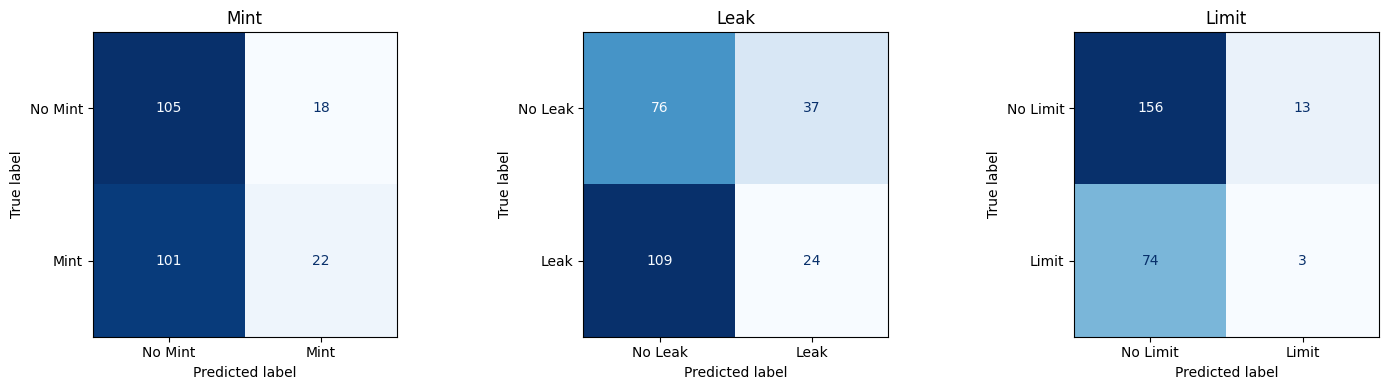

============== Threshold: 0.9 ==============
              precision    recall  f1-score   support

        Mint       0.64      0.15      0.24       123
        Leak       0.58      0.05      0.10       133
       Limit       0.25      0.01      0.02        77

   micro avg       0.59      0.08      0.14       333
   macro avg       0.49      0.07      0.12       333
weighted avg       0.53      0.08      0.13       333
 samples avg       0.10      0.07      0.08       333



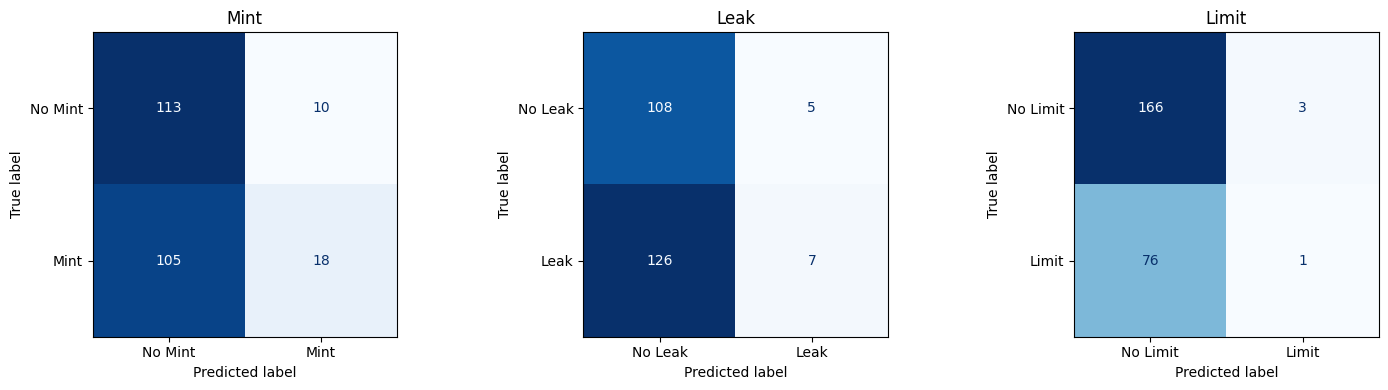

In [7]:
for threshold in np.arange(0, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)


## Test With Unlabelled

In [4]:
feature, ground_df, label_cols = grouping_data(UNLABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH20
invalid instruction: PUSH11
invalid instruction: PUSH19
invalid instruction: PUSH5
invalid instruction: PUSH25
invalid instruction: PUSH17
invalid instruction: PUSH26
invalid instruction: PUSH28
invalid instruction: PUSH29
invalid instruction: PUSH28
invalid instruction: PUSH29
invalid instruction: PUSH27
invalid instruction: PUSH18
invalid instruction: PUSH32
invalid instruction: PUSH22
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH10
invalid instruction: PUSH24
invalid instruction: PUSH31
invalid instruction: PUSH27
invalid instruction: PUSH24
invalid instruction: PUSH28
invalid instruction: PUSH12
invalid instruction: PUSH29
invalid instruction: PUSH22
invalid instruction: PUSH20
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH31
invalid instruction: PUSH18
invalid instruction: PUSH29
invalid instruction: PUSH12
invalid instruction: PUSH28
invalid instruction: PUSH26
invalid instruction: 

⚠️ Error decoding 0x0000000000000000000000006badd1fe3e7c479008877e043aeb8381fd962103: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x000000000000000000000000b401e05fafaa915c669029d5197511a8e7b32578: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x0000000000000000000000007fa77355e032ff973482758fe3d06aadfeb25c00: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x000000000000000000000000b1050d88cc43deac594f442b795a246890b0b039: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x000000000000000000000000da8deec3dcb113f2ff9838bca746d871713f3a7f: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x000000000000000000000000a22376e2bfaaa8041a11df98e7e9b47e45c92c4f: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x0000000000000000000000002848f281b4c901a389c7e363ae7670f2c2fd98d9: Expecting value: line 1 column 1 (char 0)
⚠️ Error decoding 0x00000000000000000000000088e568dd101efdd358a6edfada42f144516b8bbd: Expecting value: l

Extracting timeline features:  11%|█         | 10/91 [00:00<00:01, 47.77it/s]

Skipping 0x91923993c4dc3e089bbb1fc9d4a5a765a479b68f: invalid literal for int() with base 10: ''
Skipping 0x580c1e3caca14826976b5820947f7ad486ac174d: invalid literal for int() with base 10: ''
Skipping 0x52ff8b15ef6b38cf0554ba9207d70d0d2437c56a: invalid literal for int() with base 10: ''


Extracting timeline features:  38%|███▊      | 35/91 [00:00<00:01, 54.77it/s]

Skipping 0x70791b81028f30ff01d4ad8f83cbffcd2be1b1f3: invalid literal for int() with base 10: ''
Skipping 0x7dc4f41294697a7903c4027f6ac528c5d14cd7eb: invalid literal for int() with base 10: ''
Skipping 0x6e7f987907320630b7880eecc26b17c0d9afa7b4: invalid literal for int() with base 10: ''


Extracting timeline features:  63%|██████▎   | 57/91 [00:01<00:00, 59.52it/s]

Skipping 0x8b34fbc553db3462ad4909f2e5577cc22f63c216: invalid literal for int() with base 10: ''
Skipping 0xb08fc1db58ef5e15a6f97d8f63b2bb4a14b9df37: invalid literal for int() with base 10: ''


Extracting timeline features:  84%|████████▎ | 76/91 [00:01<00:00, 41.99it/s]

Skipping 0x02d3aea48b443a0026ed9cbc91b97d7335aba323: invalid literal for int() with base 10: ''
Skipping 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb: invalid literal for int() with base 10: ''
Skipping 0xe412189da2dfa188a1a61633114b8732bbbfba19: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 91/91 [00:02<00:00, 43.59it/s]


In [5]:
for threshold in np.arange(0.0, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    target = 'Limit'
    y_true, y_pred = merged_df[target], merged_df[f'pred_{target}']
    print(classification_report(y_true, y_pred))

============== Threshold: 0.0 ==============
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.87      0.96      0.91        78

    accuracy                           0.85        91
   macro avg       0.64      0.56      0.57        91
weighted avg       0.80      0.85      0.82        91

============== Threshold: 0.1 ==============
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.87      0.96      0.91        78

    accuracy                           0.85        91
   macro avg       0.64      0.56      0.57        91
weighted avg       0.80      0.85      0.82        91

============== Threshold: 0.2 ==============
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        13
           1       0.87      0.95      0.91        78

    accuracy                           0.84    

In [14]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, [0.7, 0.7, 0])
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
merged_df['pred_Mint'].value_counts(), merged_df['pred_Leak'].value_counts(), merged_df['Limit'].value_counts()

(pred_Mint
 0    53
 1    38
 Name: count, dtype: int64,
 pred_Leak
 0    55
 1    36
 Name: count, dtype: int64,
 Limit
 1    78
 0    13
 Name: count, dtype: int64)

In [15]:
merged_df = merged_df[['Address', 'pred_Mint', 'pred_Leak', 'Limit']].rename(columns={'pred_Mint': 'Mint', 'pred_Leak': 'Leak'}).set_index('Address')
merged_df.value_counts()

Mint  Leak  Limit
0     0     1        27
      1     1        21
1     0     1        18
      1     1        12
      0     0         6
0     0     0         4
1     1     0         2
0     1     0         1
Name: count, dtype: int64

In [16]:
ground_df = pd.read_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index_col=0)

In [20]:
new_ground_df = pd.concat([ground_df, merged_df]).reset_index()
new_ground_df = new_ground_df.drop_duplicates(subset='Address', keep='last').set_index('Address')
new_ground_df

,Mint,Leak,Limit
Address,,,
0x93023f1d3525e273f291b6f76d2f5027a39bf302,1,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,0,0,1
0x94b7d24552933f50a5a5705c446528806dcea381,0,0,0
0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093,0,0,0
0x10f6f2b97f3ab29583d9d38babf2994df7220c21,1,0,1
...,...,...,...
0xea26c4ac16d4a5a106820bc8aee85fd0b7b2b664,0,0,1
0xeca2967b2a2cc584495b2226372bc0dde481f857,0,0,0
0x7dc4f41294697a7903c4027f6ac528c5d14cd7eb,0,0,1


In [21]:
ground_df.to_csv(os.path.join(DATA_PATH, f'logs/groundtruth-{round_num-1}.csv'))

In [24]:
new_ground_df.to_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'))

In [25]:
HEX_PATH = os.path.join(UNLABELED_PATH, 'hex')
SOL_PATH = os.path.join(UNLABELED_PATH, 'sol')
TXN_PATH = os.path.join(UNLABELED_PATH, 'txn')

for src_file in tqdm(list(Path(HEX_PATH).glob('*.hex'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'hex/{address}.hex'))

for src_file in tqdm(list(Path(SOL_PATH).glob('*.sol'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'sol/{address}.sol'))

for src_file in tqdm(list(Path(TXN_PATH).glob('*.json'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'txn/{address}.json'))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
